0.18231625879420676
0.9432150416451026


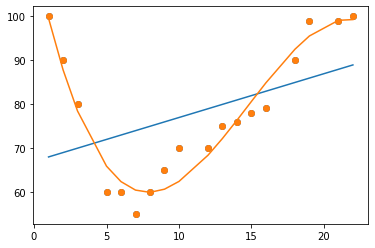

In [745]:
# Example 1: This is a basic example of Polynomial Regression
# If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.
# Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

# In the example below, we have registered 18 cars as they were passing a certain tollbooth.
# We have registered the car's speed, and the time of day (hour) the passing occurred.
# The x-axis represents the hours of the day and the y-axis represents the speed:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# good array for linearregression. bad array for polynomialregresssion
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
#y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

# bad array for linearregression. good array for polynomialregresssion
x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22])
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

x = x.reshape(-1,1)
y = y.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred)
print(r2_score(y,y_pred))

# Now let's use Polynomial regression to test x and y

poynom  = PolynomialFeatures(degree = 3)
x_polynom = poynom.fit_transform(x) # only takes x as an argument
x_polynom

lrPoly = LinearRegression()
lrPoly.fit(x_polynom,y) # fit takes fit_transform x and y as an argument
y_pred1 = lrPoly.predict(x_polynom)
plt.scatter(x,y)
plt.plot(x,y_pred1)
print(r2_score(y,y_pred1))










In [746]:
# Example 2 : This is a practical more advance Polynonial Regression. We have a table namely [Tutorial].[dbo].[TimeSpeedActual] in SQL Server.
# In the example below, we have registered 5 different type of automomobile as they were passing a certain tollbooth.
# We have registered the automobile speed,type of automobile and the time of day (hour) the passing occurred.
# The x-axis represents the type of automobile and hours of the day and the y-axis represents the speed:
# The type of automobiles are: Heavy Truck cc500  ,Light Truck cc350 ,Light car cc180 , Medium Car cc220 and Super Car  cc350  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pyodbc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


# Step 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')

# ORDER BY clause is important here bcos we have to make sure that dummies variables are in the same order in prediction and actual table after using get_dummies.
query_str = "SELECT * FROM [Tutorial].[dbo].[TimeSpeedActual] ORDER BY AutomobileType" 
df = pd.read_sql(sql=query_str, con=conn_str)
df




,AutomobileType,Time_of_Day,AverageSpeed
0,Heavy Truck cc500,1,88
1,Heavy Truck cc500,2,78
2,Heavy Truck cc500,3,68
3,Heavy Truck cc500,5,48
4,Heavy Truck cc500,6,48
...,...,...,...
85,Super Car cc350,16,86
86,Super Car cc350,18,97
87,Super Car cc350,19,106
88,Super Car cc350,21,106


In [747]:
# Step 2: Let's use Dummy Variables get_dummies function to turn AutomobileType rows to integer columns and also change columns name using columns function.
dummies = pd.get_dummies(df.AutomobileType)
dummies.columns = ['HeavyTruck_cc500', 'LightTruck_cc350','LightCar_cc180', 'MediumCar_cc220' , 'SuperCar_cc350']  
dummies                                                           

,HeavyTruck_cc500,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
85,0,0,0,0,1
86,0,0,0,0,1
87,0,0,0,0,1
88,0,0,0,0,1


In [748]:
# Now, let's merge our dummies variables with df using concac function of pandas library.
merge = pd.concat([df,dummies], axis = 'columns')
merge

,AutomobileType,Time_of_Day,AverageSpeed,HeavyTruck_cc500,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,Heavy Truck cc500,1,88,1,0,0,0,0
1,Heavy Truck cc500,2,78,1,0,0,0,0
2,Heavy Truck cc500,3,68,1,0,0,0,0
3,Heavy Truck cc500,5,48,1,0,0,0,0
4,Heavy Truck cc500,6,48,1,0,0,0,0
...,...,...,...,...,...,...,...,...
85,Super Car cc350,16,86,0,0,0,0,1
86,Super Car cc350,18,97,0,0,0,0,1
87,Super Car cc350,19,106,0,0,0,0,1
88,Super Car cc350,21,106,0,0,0,0,1


In [749]:
# Now the next step is to always drop 2 columns. The first one is your textual column(s) and the second one is that by rule of thumb, you must drop
# one of the dummy variable column. 
final = merge.drop(['AutomobileType','HeavyTruck_cc500'], axis = 'columns')
final

,Time_of_Day,AverageSpeed,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,1,88,0,0,0,0
1,2,78,0,0,0,0
2,3,68,0,0,0,0
3,5,48,0,0,0,0
4,6,48,0,0,0,0
...,...,...,...,...,...,...
85,16,86,0,0,0,1
86,18,97,0,0,0,1
87,19,106,0,0,0,1
88,21,106,0,0,0,1


In [750]:
# Now, let's get all the independent variable x by simply droping depenedent variable y namely AverageSpeed
# x = np.array(final.drop(['AverageSpeed'], axis = 'columns'))
x = final.drop(['AverageSpeed'], axis = 'columns')
# x = x.values
x



,Time_of_Day,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,5,0,0,0,0
4,6,0,0,0,0
...,...,...,...,...,...
85,16,0,0,0,1
86,18,0,0,0,1
87,19,0,0,0,1
88,21,0,0,0,1


In [751]:
# Let's get our dependent variable y
y = final.AverageSpeed
#y = y.values
y

0      88
1      78
2      68
3      48
4      48
     ... 
85     86
86     97
87    106
88    106
89    107
Name: AverageSpeed, Length: 90, dtype: int64

The r2 score is :  0.3134419359613836
Predicted speeds are :  [83.77666992 87.53704604 61.61942015 77.68131424 80.0162938  78.86317095
 68.52213662 78.39402289 79.33411692 78.13610574 74.86103215 70.160562
 62.55951418 74.78073657 77.60101866 67.11289453 64.29261244 63.49960821
 86.59695201 85.20206648 57.85904403 87.32401722 79.80326498 70.08026642
 88.26411125 74.1627008  81.21430498 69.14017239 82.62354707 75.80112618
 72.98084409 88.96244259 58.79913806 84.50373513 80.95638783 73.84064254
 90.35732813 69.46223065 80.74335901 76.51383483 93.17761022 95.05779828
 86.14216051 70.40232468 89.4172341  76.25591768 76.04288886 63.35251841
 73.69355274 66.1728005  81.44169036 73.92093812 71.02036045 88.02234856
 62.41242438 72.28251274 88.47714007 68.20007836 92.23751619 83.32187842
 80.50159633 74.63364677 70.87327065]
Speed at 23:00 for HeavyTruck_cc500 is : [78.54111269]


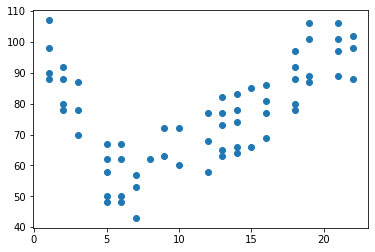

In [752]:
# Let's try Linear regression
#  fit your model to use available datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr1 = LinearRegression() # get linear regression object
#lr1.fit(x_train[['Time_of_Day','LightTruck_cc350','LightCar_cc180', 'MediumCar_cc220' , 'SuperCar_cc350']],y_train) # fit your linear regression model. Note that your independent first argument is a 2d array
lr1.fit(x_train,y_train) # fit your linear regression model. 

# Step 4 : let's get the predicted salary. Pass in your x variable to a predict function to get y. Note that predict takes 2d array
#predicted_speed = lr1.predict(x_train[['Time_of_Day','LightTruck_cc350','LightCar_cc180', 'MediumCar_cc220' , 'SuperCar_cc350']])
predicted_speed = lr1.predict(x_train)
gradient = lr1.coef_ # this gives you the gradient or slope
intercept = lr1.intercept_ # this gives you the intercept on the y axix.
r2 = r2_score(y_train,predicted_speed)
print("The r2 score is : ", r2)

print("Predicted speeds are : ",predicted_speed)

# Let's predict with linear progression : the result is quite poor with linear regression
p = lr1.predict([[23,0,0,0,0]])
print("Speed at 23:00 for HeavyTruck_cc500 is :",p)

# We can see from the scatered graph below that the shape is u or v. This explains why r2_score using linear regression is quite poor. 
# This shape will be perfect for polynomial regression.
plt.scatter(x_train.Time_of_Day,y_train)


In [753]:
# Add the polynomial term to the equation/model
# get PolynomialFeatures function and pass in degree. The default is 2 but this can be increase or decrease. By increasing degree, you might end up over-fitting
# your model. This means the actual values and predicted values is almost the same. On the other hand, if you use a very low number for degree, you might end up
# under-fitting your model. This means, the difference between predicted values and actual values will be large.
polynom  = PolynomialFeatures(degree = 4)
x_polynom = polynom.fit_transform(x_train) # only takes x as an argument

polynom.fit(x_polynom,y_train)

LinReg = LinearRegression()
LinReg.fit(x_polynom,y_train)





LinearRegression()

In [754]:
y_predict = LinReg.predict(x_polynom)


print("Speed at 23:00 for HeavyTruck_cc500 is :",LinReg.predict(polynom.fit_transform([[23,0,0,0,0]]) ))

r2 = r2_score(y_train,y_predict) # Note that polynomial gives a very good r2_score compared to linear regression above
print("The r2 score is : ", r2)
print("Predicted speed using polynomial regresiion are :", y_predict)

Speed at 23:00 for HeavyTruck_cc500 is : [92.15512739]
The r2 score is :  0.9672720613003991
Predicted speed using polynomial regresiion are : [ 68.72554585  79.99825179  48.98476387  65.27180271  71.04020504
  67.37946922 100.38068151  80.53265753  83.74982615  83.42348472
  60.59063311  90.5092176   45.93551968  82.11229221  89.56937941
  51.84591867  67.13550833  44.89696786  76.68344327  93.03898171
  90.55563955  95.62748032  70.80432117  65.25567704  98.79494865
  57.23444304  90.6501414   61.25065464  80.95512726  61.02973218
  64.84734375 103.1679753   74.73626938  87.03207355  68.21341666
  79.29989804  90.2660525   85.61514418  74.27272207  74.06679821
 100.49543306 108.08773207  95.75242623  74.53341944  86.85203172
 107.7619532   58.98589764  77.6729688   63.92313026  54.66692277
  79.65912512  61.73258535  69.14159891 100.70178589  91.73503964
  61.38427194  83.4148643   57.2613394   97.03758582  86.84048429
  75.85790675  67.33363074  54.6874575 ]


In [755]:
# let's get the sql table and predict any of our automobiles speed for the independent variables
# get your data and assign it to a pandas variable myvars

#Step 1
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
myquery_str1 = "SELECT [AutomobileType],[Time_of_Day],[AverageSpeed] FROM [Tutorial].[dbo].[TimeSpeedPrediction] ORDER BY [AutomobileType]"
myvars1 = pd.read_sql(sql=myquery_str1, con=conn_str)
myvars1.head()

,AutomobileType,Time_of_Day,AverageSpeed
0,Heavy Truck cc500,0,None
1,Heavy Truck cc500,4,None
2,Heavy Truck cc500,11,None
3,Heavy Truck cc500,17,None
4,Heavy Truck cc500,20,None


In [756]:
# Step 2: Let's use Dummy Variables get_dummies function to turn AutomobileType rows to integer columns and also change columns name using columns function.
dummies1 = pd.get_dummies(myvars1.AutomobileType)
dummies1.columns = ['HeavyTruck_cc500', 'LightTruck_cc350','LightCar_cc180', 'MediumCar_cc220' , 'SuperCar_cc350']  
dummies1.head() 


,HeavyTruck_cc500,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [757]:
# Now, let's merge our dummies variables with df using concac function of pandas library.
merge1 = pd.concat([myvars1,dummies1], axis = 'columns')
merge1.head()

,AutomobileType,Time_of_Day,AverageSpeed,HeavyTruck_cc500,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,Heavy Truck cc500,0,None,1,0,0,0,0
1,Heavy Truck cc500,4,None,1,0,0,0,0
2,Heavy Truck cc500,11,None,1,0,0,0,0
3,Heavy Truck cc500,17,None,1,0,0,0,0
4,Heavy Truck cc500,20,None,1,0,0,0,0


In [758]:
# Now the next step is to always drop 2 columns. The first one is your textual column(s) and the second one is that by rule of thumb, you must drop
# one of the dummy variable column. 
final1 = merge1.drop(['AutomobileType','HeavyTruck_cc500'], axis = 'columns')
final1.head()

,Time_of_Day,AverageSpeed,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,0,None,0,0,0,0
1,4,None,0,0,0,0
2,11,None,0,0,0,0
3,17,None,0,0,0,0
4,20,None,0,0,0,0


In [759]:
# Now, let's get all the independent variable x by simply droping depenedent variable y namely AverageSpeed
x = final1.drop(['AverageSpeed'], axis = 'columns')
x.head()

,Time_of_Day,LightTruck_cc350,LightCar_cc180,MediumCar_cc220,SuperCar_cc350
0,0,0,0,0,0
1,4,0,0,0,0
2,11,0,0,0,0
3,17,0,0,0,0
4,20,0,0,0,0


In [760]:
# Now, let's get the predicted speed for all independent variables stored in x.
# remember to go back to your fit model ie LinReg and pass in x to your predict function

# this gives you predicted speed that are now assign to variable p.
p = LinReg.predict(polynom.fit_transform(x) )



print("Predicted speeds are :", p)

Predicted speeds are : [110.93711812  54.47988852  53.46008655  76.20464821  84.6947608
  92.15512739 119.3862498   66.61683645  64.14136149  84.07047876
  92.70971053 102.4068482  109.86052926  59.62139742  57.45548457
  77.32563238  87.07663825  99.27314894 126.35297626  70.3642107
  68.47900225  90.07542382  98.27457317 105.84459986 125.6735309
  75.97050204  73.58923539  93.65077268 104.13080306 117.73014979]


In [761]:
# now, let assign p to a newly created column namely PredictedPrices. Note that areasize is actually your pandas variable. It act like a table. you are simply adding
# a newly created PredictedPrices column to Pandas variable table namely areasize.

x['PredictedSpeed'] = p


# add AutomobileType column
x["AutomobileType"] = "HeavyTruck_cc500"
x["AutomobileType"][x["LightCar_cc180"] == 1] = "LightCar_cc180"
x["AutomobileType"][x["LightTruck_cc350"] == 1] = "LightTruck_cc350"
x["AutomobileType"][x["MediumCar_cc220"] == 1] = "MediumCar_cc220"
x["AutomobileType"][x["SuperCar_cc350"] == 1] = "SuperCar_cc350"

print(x.head())





   Time_of_Day  LightTruck_cc350  LightCar_cc180  MediumCar_cc220  \
0            0                 0               0                0   
1            4                 0               0                0   
2           11                 0               0                0   
3           17                 0               0                0   
4           20                 0               0                0   

   SuperCar_cc350  PredictedSpeed    AutomobileType  
0               0      110.937118  HeavyTruck_cc500  
1               0       54.479889  HeavyTruck_cc500  
2               0       53.460087  HeavyTruck_cc500  
3               0       76.204648  HeavyTruck_cc500  
4               0       84.694761  HeavyTruck_cc500  


C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [762]:
# Drop dummies columns
x = x.drop(['LightCar_cc180','LightTruck_cc350','MediumCar_cc220','SuperCar_cc350'], axis = 'columns')
# Let's add a Status column of value Predicted so that we can differential between actual and predicted tables
x['Status'] = "Predicted"
x.head()

,Time_of_Day,PredictedSpeed,AutomobileType,Status
0,0,110.937118,HeavyTruck_cc500,Predicted
1,4,54.479889,HeavyTruck_cc500,Predicted
2,11,53.460087,HeavyTruck_cc500,Predicted
3,17,76.204648,HeavyTruck_cc500,Predicted
4,20,84.694761,HeavyTruck_cc500,Predicted


In [763]:
# lastly, insert predicted table into TimeSpeed table
cursor = conn_str.cursor()
cursor.execute("EXEC [LoadTimeSpeed]") # truncate table and only load it with actual data.
for i, row in x.iterrows():
 cursor.execute("INSERT INTO [Tutorial].[dbo].[TimeSpeed]([AutomobileType],[Time_of_Day],[AverageSpeed],[Status]) values(?,?,?,?)", row['AutomobileType'],row['Time_of_Day'],row['PredictedSpeed'] ,row['Status']) 
conn_str.commit()
cursor.close()
conn_str.close()
